In [10]:
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [22]:
from ISLP import load_data
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [4]:
boston_df = load_data("Boston")
boston_df


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    boston_df.drop("medv", axis=1), boston_df["medv"], test_size=0.25
)

In [11]:
rf_model = RF(max_features=X_train.shape[1], n_estimators=500, random_state=0).fit(
    X_train, y_train
)
y_predict = rf_model.predict(X_test)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


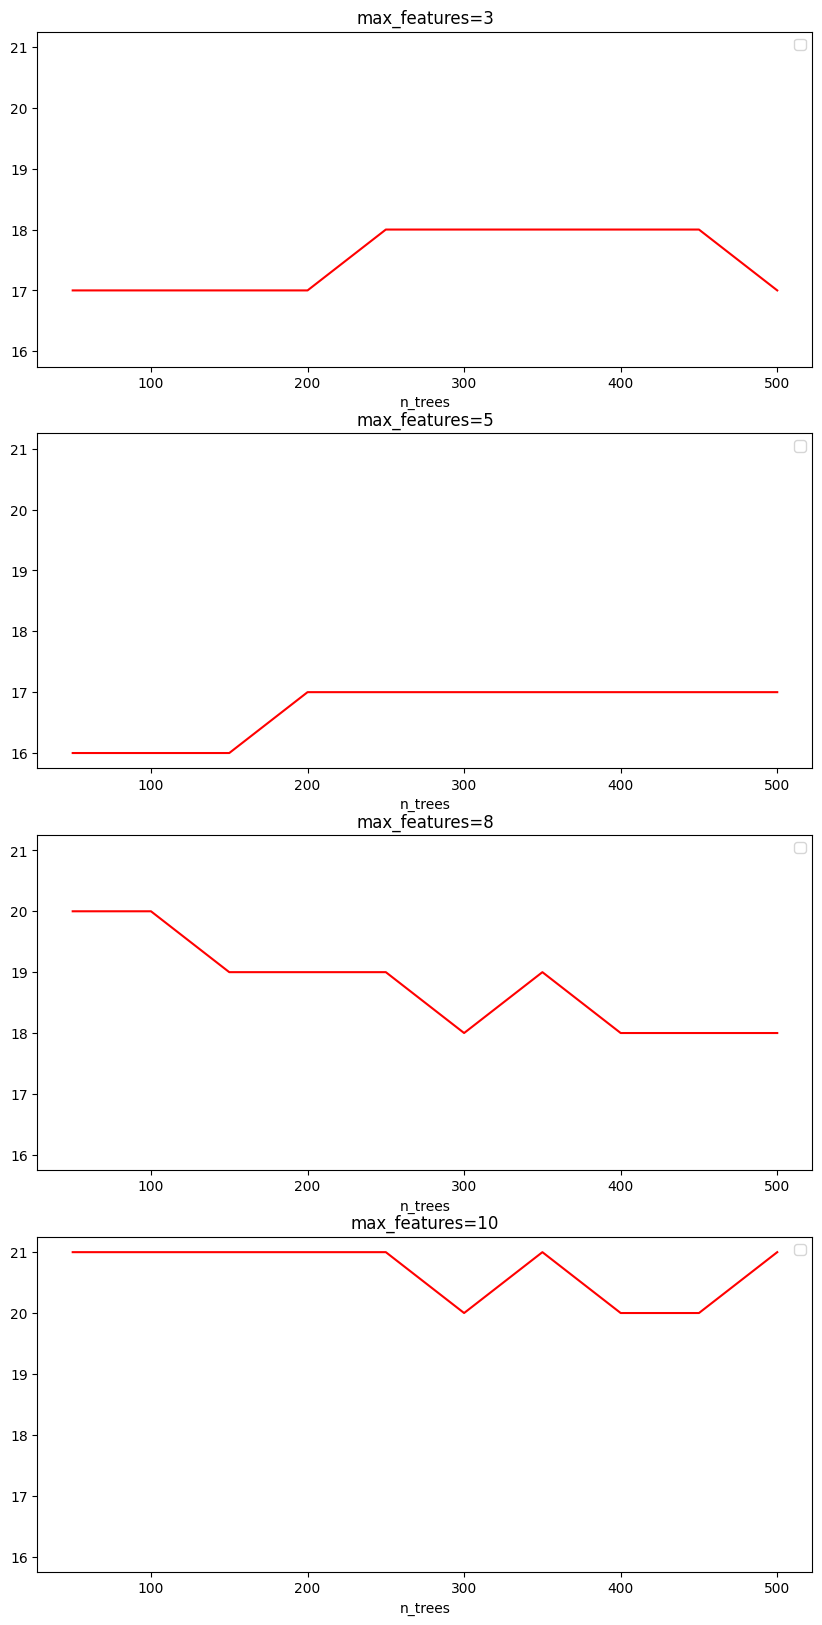

In [24]:
max_features_list = [3, 5, 8, 10 ]
n_trees_list = list(np.arange(50, 501, 50))
fig, ax = plt.subplots(nrows=len(max_features_list), figsize=(10, 20), sharey=True)

for max_features in max_features_list:
    test_error_list = np.zeros_like(n_trees_list)
    for n_trees in n_trees_list:
        rf_model = RF(
            max_features=max_features, n_estimators=n_trees, random_state=0
        ).fit(X_train, y_train)
        y_predict = rf_model.predict(X_test)
        test_error = mean_squared_error(y_test, y_predict)
        test_error_list[n_trees_list.index(n_trees)] = test_error
    ax[max_features_list.index(max_features)].plot(
        n_trees_list, test_error_list, "r"
    )
    ax[max_features_list.index(max_features)].legend()
    ax[max_features_list.index(max_features)].set_title( f"max_features={max_features}" )
    ax[max_features_list.index(max_features)].set_xlabel("n_trees")
plt.show()